## 1번

데이터 확인 및 전처리

1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시

1.2 F, M feature 기반으로 군집분석 실시, 필요시 이상값 보정

1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술

1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시

데이터 설명

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

출처

https://archive.ics.uci.edu/ml/index.phpm

In [ ]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

1.1 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시

In [ ]:
from pandas import Series
F =  df.groupby('CustomerID')['InvoiceDate'].agg([('frequency', Series.nunique)]).reset_index()
df['Buy_am'] = df['UnitPrice']*df1['Quantity']
M = df1.groupby('CustomerID')['Buy_am'].agg([('monetary',np.sum)]).reset_index()
features = F.merge(M, how='left');features

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].hist(bins = 50, x=features['frequency'])
ax[1].hist(bins =50, x=features['monetary'])
plt.show()

In [ ]:
# 1.2 F, M feature 기반으로 군집분석 실시, 필요시 이상값 보정
sns.boxplot(data = features[['frequency','monetary']])
# 이상치 확인 결과 monetary 변수에는 이상치가 보인다. 연속적으로 이어진 이상치의 경우 실제 존재하는 값일수 있으므로 동떨어진 이상치만 제거

In [ ]:
out_lier = features[features['monetary']>200000]
features= features.drop(index = out_lier.index)

In [ ]:
features

In [ ]:
# K-means 알고리즘 사용
from sklearn.cluster import KMeans
X = features.drop('CustomerID',axis=1)
X

In [ ]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score 
for k in range(2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print("calinski_harabasz_score: ",calinski_harabasz_score(X,labels),"silhouette_score:",silhouette_score(X,labels))

In [77]:
# 데이터가 문제와 달라서 적합한 군집의 수를 정하지 못했음

## 2번

시계열분석

2.1 EDA와 시각화를 진행하라

2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

In [90]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col=0)
df.head()
# 시계열문제인데 데이터에는 시간컬럼이 없음....
# 복원문제로 데이터가 실제 시험과 달라서 분석 진행이 어려움..

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5


(array([ 3., 11., 26., 37., 54., 60., 48., 27., 19., 10.]),
 array([239.4 , 288.38, 337.36, 386.34, 435.32, 484.3 , 533.28, 582.26,
        631.24, 680.22, 729.2 ]),
 <BarContainer object of 10 artists>)

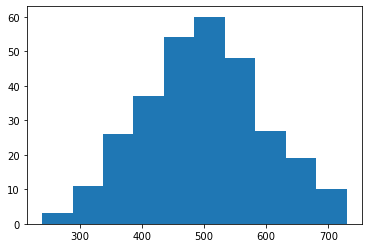

In [83]:
plt.hist(x = df['counts'])

## 3번 통계문제
3-1번

서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [4]:
# 조화평균
speed = (2*100*80)/(100+80)
print("평균 속도: ", speed,"km/h")

평균 속도:  88.88888888888889 km/h


3-2번

연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?

In [12]:
a = (((4000/3000)*(5000/4000))**(1/2)-1)*100
print('연평균증가율:',a,'%')

연평균증가율: 29.09944487358056 %


3-3번

남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오
출처: https://www.datamanim.com/dataset/ADPpb/00/25.html

In [9]:
df= pd.DataFrame({'등산':[20,15],'수영':[10,30]},index=['남자','여자'])
df

,등산,수영
남자,20,10
여자,15,30


In [14]:
# 조건부 확률
# 남성일 확률: 30/75
# 남자이면서 등산을 좋아할 확률: 20/75
# 남성 중에서 등산을 좋아할 확률: (20/75)/(30/75)
(20/75)/(30/75)

0.6666666666666666

3-4번

표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

In [28]:
import numpy as np
from scipy import stats

n = 10
s2 = 90
alpha = 0.05

# 카이제곱 분포의 분위수 계산
chi2_lower = chi2.ppf(alpha/2, df=n-1)
chi2_upper = chi2.ppf(1-alpha/2, df=n-1)

# 모분산의 95% 신뢰구간 계산
ci_lower = (n-1)*s2/chi2_lower
ci_upper = (n-1)*s2/chi2_upper

print("모분산의 95% 신뢰구간: ({:.2f}, {:.2f})".format(ci_lower, ci_upper))


모분산의 95% 신뢰구간: (299.96, 42.58)


## 4번

4번 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다

4.1 귀무가설과 연구가설을 제시하시오

4.2 검정 후 귀무가설 기각 여부 제시

In [30]:
# 4.1 귀무가설과 연구가설을 제시하시오
# 귀무가설: 혈압약 투약 이전과 이후의 차이는 없다
# 연구가설: 혈압략 투약 이전과 이후의 차이는 있다.

In [41]:
xbar = 25
n= 20
se =9
alpha=0.05

t_alpha = stats.t.ppf(1-alpha/2,n-1)

In [51]:
ci = (xbar - t_alpha*s/np.sqrt(n), xbar+t_alpha*s/np.sqrt(n))
ci

(20.787870342220813, 29.212129657779187)

In [52]:
# 검정결과 신뢰구간안에 모평균의 추정이 포함되지 않으므로 귀무가설을 기가한다.
# 즉 혈압약 투약 이전과 이후의 차이는 있다

## 5번

공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다

5.1 귀무가설과 연구가설을 제시하시오

5.2 검정 후 귀무가설 기각 여부 제시

import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

In [55]:
# 귀무가설과 연구가설을 제시하시오.
# 귀무가설: 공장 X,Y,Z의 출하 소요시간의 중위수에는 차이가 없다.
# 연구가설 : X, Y, Z의 출하 소요시간 중위수는 서로 다르다.

In [68]:
df_X = df.query('공장명=="X"')['출하 소요시간']
df_Y = df.query('공장명=="Y"')['출하 소요시간']
df_Z = df.query('공장명=="Z"')['출하 소요시간']

In [69]:
stats.kruskal(df_X, df_Y, df_Z)

KruskalResult(statistic=0.7217886080379153, pvalue=0.6970526702392181)

In [ ]:
# 검정결과 p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.
# 즉 공장별로 출하 소요시간의 중위수에는 차이가 없다.

## 6번

1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오

In [7]:
df = pd.DataFrame({'1개년':[10,15,12,13,16],'2개년':[20,14,11,25,30],'3개년':[15,19,30,20,24]},index=['1안','2안','3안','4안','5안'])
df

,1개년,2개년,3개년
1안,10,20,15
2안,15,14,19
3안,12,11,30
4안,13,25,20
5안,16,30,24


In [8]:
from itertools import combinations
import pandas as pd

In [16]:
investment_df = pd.DataFrame([[10,20,15],[15,14,19],[12,11,30],[13,25,20],[16,30,24]],
index = ["1","2","3","4","5"], columns =['1YR','2YR','3YR'])

In [18]:
items = ['1', '2', '3', '4', '5']

In [20]:
inv_combination_list =  list(combinations(items, 1))+ list(combinations(items, 2))+ list(combinations(items, 3))+\
list(combinations(items, 4))+list(combinations(items, 5))


In [21]:
result_df = pd.DataFrame()

In [23]:
for i in inv_combination_list:
    temp_df = pd.DataFrame()
    for item in items:
        if item in i:
            temp_df = pd.concat([temp_df, investment_df.loc[item]],axis=1)
    result_df= pd.concat([result_df, temp_df.sum(axis=1)],axis=1)

In [35]:
result_df1 = pd.DataFrame()
temp_df1 = pd.DataFrame()
temp_df1= pd.concat([temp_df1,investment_df.loc['1']],axis=1)
result_df1 = pd.concat([result_df1, temp_df1.sum(axis=1)],axis=1)
result_df1

,0
1YR,10
2YR,20
3YR,15


In [36]:
temp_df1

,1
1YR,10
2YR,20
3YR,15


In [25]:
result_df.columns = inv_combination_list
fin_df = result_df.T
fin_df['total'] = fin_df.sum(axis=1)

In [27]:
fin_df[(fin_df['1YR']<50)&(fin_df['2YR']<60)&(fin_df['3YR']<70)].sort_values(by='total',ascending=False)

,1YR,2YR,3YR,total
"(2, 3, 4)",40,50,69,159
"(1, 3, 4)",35,56,65,156
"(1, 2, 4)",38,59,54,151
"(1, 2, 3)",37,45,64,146
"(4, 5)",29,55,44,128
"(3, 5)",28,41,54,123
"(2, 5)",31,44,43,118
"(1, 5)",26,50,39,115
"(3, 4)",25,36,50,111
"(2, 4)",28,39,39,106


# 참고
NPV(Net Present Value, 순현재가치)는 현재 가치로 환산된 현금흐름의 합에서 초기 투자액을 뺀 것을 의미합니다. 다음은 NPV를 구하는 공식입니다.

NPV = ∑(현금흐름 / (1+r)^t) - 초기 투자액

여기서,

현금흐름: 향후 예상되는 현금흐름
r: 할인율
t: 현금흐름이 발생하는 시점에서 현재까지의 시간 (년, 월 등)
예를 들어, 초기 투자액이 1,000이고 연이율이 5%이며, 1년 후에 500, 2년 후에 600, 3년 후에 700의 현금흐름이 발생한다면, NPV는 다음과 같이 계산할 수 있습니다.

NPV = 500 / (1+0.05)^1 + 600 / (1+0.05)^2 + 700 / (1+0.05)^3 - 1,000

위 공식에 따라 계산하면 NPV가 나옵니다.